Setelah dilakukan Pengumpulan Data Pemeriksaan awal diabetes di Puskesmas Panunggangan maka dilakukan prediksi apakah pasien tertentu berisiko Tidak Terindikasi, Berisiko Rendah Diabetes, Berisiko Tinggi Diabetes, dan Diabetes Melitus berdasarkan rincian medis yang diberikan.

Kita akan mulai dengan mengimpor paket-paket penting yang akan kita gunakan untuk memuat dataset dan membuat pengklasifikasian. Kami akan menggunakan library **scikit-learn** untuk memuat dan menggunakan algoritma.

**Apa itu Scikit-learn?**

modul analisis data prediktif yang dirancang untuk pembelajaran mesin/machine learning mudah digunakan, fleksibel, dan open-source, sehingga siapa pun dapat memanfaatkan library untuk menganalisa data dan membuat prediksi yang akurat/tepat.

**Tentukan Library**

In [1]:
import pandas as pd #ngolah data string
import numpy as np #melakukan perhitungan aljabar

#Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from sklearn.preprocessing import LabelEncoder
import openpyxl
import sklearn

**Buka Dataset**

File yang akan digunakan adalah file Pemeriksaan Awal Diabetes di Puskesmas Panunggangan

In [2]:
df = pd.read_excel('Data Januari - April 2024.xlsx')
df

,Tanggal,Jenis Kelamin,Usia,Berat Badan,Tinggi Badan,IMT,Polidipsia,Poliuria,Luka Lamban Sembuh,Berat Badan Turun,GDP,Interpretasi,GDS,Interpretasi.1,Status Indikasi Diabetes
0,2024-01-02,Laki-laki,65,59,164,21.936347,Iya,Iya,Tidak,Tidak,124.0,Prediabetes,NaN,NaN,Risiko Tinggi Diabetes
1,2024-01-02,Perempuan,30,60,165,22.038567,Iya,Iya,Tidak,Tidak,124.0,Prediabetes,NaN,NaN,Risiko Tinggi Diabetes
2,2024-01-02,Laki-laki,60,72,169,25.209201,Iya,Iya,Tidak,Tidak,123.0,Prediabetes,NaN,NaN,Risiko Tinggi Diabetes
3,2024-01-02,Perempuan,64,54,178,17.043303,Tidak,Tidak,Tidak,Tidak,71.0,Normal,NaN,NaN,Tidak Terindikasi Diabetes
4,2024-01-02,Laki-laki,41,74,179,23.095409,Iya,Iya,Tidak,Tidak,117.0,Prediabetes,NaN,NaN,Risiko Rendah Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,2024-04-30,Perempuan,63,62,165,22.773186,Iya,Iya,Tidak,Tidak,NaN,NaN,143.0,Pradiabetes,Risiko Rendah Diabetes
1136,2024-04-30,Perempuan,71,73,163,27.475629,Iya,Iya,Tidak,Tidak,NaN,NaN,148.0,Pradiabetes,Risiko Rendah Diabetes
1137,2024-04-30,Laki-laki,64,75,179,23.407509,Tidak,Tidak,Tidak,Tidak,NaN,NaN,129.0,Normal,Tidak Terindikasi Diabetes
1138,2024-04-30,Perempuan,80,55,181,16.788254,Iya,Iya,Tidak,Iya,NaN,NaN,146.0,Pradiabetes,Risiko Rendah Diabetes


In [3]:
df.shape

(1140, 15)

In [4]:
df.describe()

,Tanggal,Usia,Berat Badan,Tinggi Badan,IMT,GDP,GDS
count,1140,1140.000000,1140.000000,1140.000000,1140.000000,799.000000,341.000000
mean,2024-03-04 17:12:00,49.677193,61.453509,163.802632,22.923826,123.226533,149.950147
min,2024-01-02 00:00:00,14.000000,39.000000,143.000000,14.172336,60.000000,104.000000
25%,2024-02-01 00:00:00,35.000000,55.000000,157.000000,21.211923,108.000000,136.000000
50%,2024-02-29 00:00:00,50.000000,61.000000,164.000000,22.598140,118.000000,144.000000
75%,2024-04-01 00:00:00,65.000000,69.000000,169.000000,23.555556,131.000000,149.000000
max,2025-01-05 00:00:00,82.000000,95.000000,183.000000,36.676610,440.000000,276.000000
std,NaN,17.136933,9.130146,9.251561,3.132535,34.710872,31.748838


In [5]:
#ceck missing value pada setiap kolom
print(df.isnull().sum())

Tanggal                       0
Jenis Kelamin                 0
Usia                          0
Berat Badan                   0
Tinggi Badan                  0
IMT                           0
Polidipsia                    0
Poliuria                      0
Luka Lamban Sembuh            0
Berat Badan Turun             0
GDP                         341
Interpretasi                341
GDS                         799
Interpretasi.1              799
Status Indikasi Diabetes      0
dtype: int64


**Kenapa dilakukan Prepocessing?**

Meningkatkan kualitas data dan performa model machine learning Anda secara signifikan.

**Melakukan Preprocessing Data**

 1. Menghilangkan feature yang tidak digunakan dalam preprocessing
 2. Mengheandle data yang hilang  
 3. melakukan transformasi data agar mudah dibaca oleh sistem
 4. melakukan normalisasi data
 5. SMOTE

In [6]:
#menghilangkan kolom pada dataset yang tidak digunakan dalam melakukan preprocessing data
df = df.drop(['Tanggal','Usia','Berat Badan',	'Tinggi Badan',	'IMT', 'Jenis Kelamin','Interpretasi','Interpretasi.1'], axis=1)

In [7]:
df.head()

,Polidipsia,Poliuria,Luka Lamban Sembuh,Berat Badan Turun,GDP,GDS,Status Indikasi Diabetes
0,Iya,Iya,Tidak,Tidak,124.0,NaN,Risiko Tinggi Diabetes
1,Iya,Iya,Tidak,Tidak,124.0,NaN,Risiko Tinggi Diabetes
2,Iya,Iya,Tidak,Tidak,123.0,NaN,Risiko Tinggi Diabetes
3,Tidak,Tidak,Tidak,Tidak,71.0,NaN,Tidak Terindikasi Diabetes
4,Iya,Iya,Tidak,Tidak,117.0,NaN,Risiko Rendah Diabetes


In [8]:
# Mengubah nama kolom menjadi huruf kecil dan tanpa spasi
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['polidipsia', 'poliuria', 'luka_lamban_sembuh', 'berat_badan_turun',
       'gdp', 'gds', 'status_indikasi_diabetes'],
      dtype='object')

In [9]:
df.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds,status_indikasi_diabetes
0,Iya,Iya,Tidak,Tidak,124.0,NaN,Risiko Tinggi Diabetes
1,Iya,Iya,Tidak,Tidak,124.0,NaN,Risiko Tinggi Diabetes
2,Iya,Iya,Tidak,Tidak,123.0,NaN,Risiko Tinggi Diabetes
3,Tidak,Tidak,Tidak,Tidak,71.0,NaN,Tidak Terindikasi Diabetes
4,Iya,Iya,Tidak,Tidak,117.0,NaN,Risiko Rendah Diabetes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   polidipsia                1140 non-null   object 
 1   poliuria                  1140 non-null   object 
 2   luka_lamban_sembuh        1140 non-null   object 
 3   berat_badan_turun         1140 non-null   object 
 4   gdp                       799 non-null    float64
 5   gds                       341 non-null    float64
 6   status_indikasi_diabetes  1140 non-null   object 
dtypes: float64(2), object(5)
memory usage: 62.5+ KB


In [11]:
# Mengganti nilai NaN dengan 0 di kolom 'gdp dan gds'
df['gdp'] = df['gdp'].map(lambda x: 0 if pd.isna(x) else x)
df['gds'] = df['gds'].map(lambda x: 0 if pd.isna(x) else x)

In [12]:
def get_index(element):
    return df.columns.get_loc(element)

In [13]:
feature = df.iloc[:, [get_index("polidipsia"), get_index("poliuria"),
                      get_index("luka_lamban_sembuh"), get_index("berat_badan_turun"),
                       get_index("gdp"), get_index("gds"),
                       get_index("status_indikasi_diabetes")]]

In [14]:
#menstranformasikan string menjadi int
# Iya = 1, Tidak = 0

feature['polidipsia'] = feature['polidipsia'].map({'Iya': 1, 'Tidak': 0})
feature['poliuria'] = feature['poliuria'].map({'Iya': 1, 'Tidak': 0})
feature['luka_lamban_sembuh'] = feature['luka_lamban_sembuh'].map({'Iya': 1, 'Tidak': 0})
feature['berat_badan_turun'] = feature['berat_badan_turun'].map({'Iya': 1, 'Tidak': 0})

# Tidak terindikasi = 1 , Risiko Rendah Diabetes = 2, Risiko Tinggi Diabetes = 3 , Diabetes Melitus = 4
feature['status_indikasi_diabetes'] = feature['status_indikasi_diabetes'].map({'Tidak Terindikasi Diabetes':1,
                                                                               'Risiko Rendah Diabetes' : 2,
                                                                               'Risiko Tinggi Diabetes' : 3,
                                                                               'Diabetes Melitus' : 4})

#kolom float menjadi integer
feature['gdp'] = feature['gdp'].astype(int)
feature['gds'] = feature['gds'].astype(int)


feature.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds,status_indikasi_diabetes
0,1,1,0,0,124,0,3
1,1,1,0,0,124,0,3
2,1,1,0,0,123,0,3
3,0,0,0,0,71,0,1
4,1,1,0,0,117,0,2


In [15]:
#Cek keseluruhan Data
np.sum(pd.isnull(feature).sum())

0

In [16]:
feature.shape

(1140, 7)

**Normalisasi** adalah proses penskalaan sampel individu agar memiliki norma satuan . Proses ini dapat berguna jika Anda berencana menggunakan bentuk kuadrat seperti perkalian, titik, atau kernel lainnya untuk mengukur kemiripan pasangan sampel mana pun.

**Normalization data use min-max**

Proses mengubah Skala data agar memiliki rentang nilai yang seragam

In [17]:
#membuat variabel dependen dan variabel independen
label = feature["status_indikasi_diabetes"]
feature_1 = feature.drop(columns=['status_indikasi_diabetes'])
feature_1.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds
0,1,1,0,0,124,0
1,1,1,0,0,124,0
2,1,1,0,0,123,0
3,0,0,0,0,71,0
4,1,1,0,0,117,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_norm = scaler.fit_transform(feature_1)
feature_norm = pd.DataFrame(feature_norm, columns=feature_1.columns)
feature_norm

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds
0,1.0,1.0,0.0,0.0,0.281818,0.000000
1,1.0,1.0,0.0,0.0,0.281818,0.000000
2,1.0,1.0,0.0,0.0,0.279545,0.000000
3,0.0,0.0,0.0,0.0,0.161364,0.000000
4,1.0,1.0,0.0,0.0,0.265909,0.000000
...,...,...,...,...,...,...
1135,1.0,1.0,0.0,0.0,0.000000,0.518116
1136,1.0,1.0,0.0,0.0,0.000000,0.536232
1137,0.0,0.0,0.0,0.0,0.000000,0.467391
1138,1.0,1.0,0.0,1.0,0.000000,0.528986


**MinMaxScaler():** Memuat kelas MinMaxScaler dari pustaka sklearn.preprocessing.
**scaler.fit_transform(feature_1):** Melatih scaler dengan data pada feature_1 dan mentransformasi data menjadi nilai yang dinormalisasi.
fit_transform melakukan dua langkah:
  
    fit(feature_1) Menghitung nilai minimum dan maksimum untuk setiap fitur dalam feature_1.
    transform(feature_1) Menggunakan nilai minimum dan maksimum yang telah dihitung untuk mentransformasi setiap nilai dalam feature_1 ke dalam rentang 0 dan 1.

**pd.DataFrame(feature_norm, columns=feature_1.columns):** Mengubah data yang dinormalisasi menjadi dataframe dengan nama kolom yang sama dengan kolom asli di feature_1.

In [19]:
feature_norm["status_indikasi_diabetes"] = label
feature_norm

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds,status_indikasi_diabetes
0,1.0,1.0,0.0,0.0,0.281818,0.000000,3
1,1.0,1.0,0.0,0.0,0.281818,0.000000,3
2,1.0,1.0,0.0,0.0,0.279545,0.000000,3
3,0.0,0.0,0.0,0.0,0.161364,0.000000,1
4,1.0,1.0,0.0,0.0,0.265909,0.000000,2
...,...,...,...,...,...,...,...
1135,1.0,1.0,0.0,0.0,0.000000,0.518116,2
1136,1.0,1.0,0.0,0.0,0.000000,0.536232,2
1137,0.0,0.0,0.0,0.0,0.000000,0.467391,1
1138,1.0,1.0,0.0,1.0,0.000000,0.528986,2


In [20]:
feature_norm.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds,status_indikasi_diabetes
0,1.0,1.0,0.0,0.0,0.281818,0.0,3
1,1.0,1.0,0.0,0.0,0.281818,0.0,3
2,1.0,1.0,0.0,0.0,0.279545,0.0,3
3,0.0,0.0,0.0,0.0,0.161364,0.0,1
4,1.0,1.0,0.0,0.0,0.265909,0.0,2


Data imbalance atau tidak?

<Axes: xlabel='status_indikasi_diabetes', ylabel='count'>

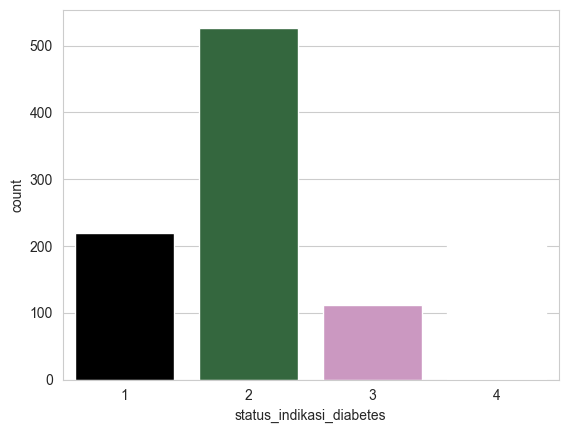

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='status_indikasi_diabetes', data=feature_norm, hue='status_indikasi_diabetes', palette='cubehelix', legend=False)

**Melakukan SMOTE  dan Gaussian Base-SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) dan Gaussian Base SMOTE adalah dua teknik oversampling yang digunakan untuk mengatasi ketidakseimbangan kelas dalam machine learning. Keduanya bertujuan untuk meningkatkan jumlah data untuk kelas minoritas (kelas dengan jumlah data yang lebih sedikit) agar model klasifikasi dapat belajar dengan lebih baik.

**SMOTE**

**Cara Kerja**

Import library yang dibutuhkan:

    imblearn.over_sampling.SMOTE: Mengimpor class SMOTE untuk oversampling.
    collections.Counter: Mengimpor class Counter untuk menghitung kemunculan setiap kelas.

Inisialisasi SMOTE:

    smote = SMOTE(random_state=42): Membentuk objek SMOTE dengan random_state untuk menjaga konsistensi hasil (reproducibility).

Menerapkan SMOTE:

    X_train_smote, y_train_smote = smote.fit_resample(...):
    feature_norm.drop(columns=['status_indikasi_diabetes']): Memilih fitur, kecuali variabel target.
    feature_norm['status_indikasi_diabetes']: Memilih variabel target.
    fit_resample: Menerapkan SMOTE untuk menghasilkan sampel sintetis untuk kelas minoritas, sehingga menyeimbangkan dataset.

Mencetak distribusi kelas:

    print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_train_smote)): Menampilkan jumlah sampel di setiap kelas setelah SMOTE diterapkan.



In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(feature_norm.drop(columns=['status_indikasi_diabetes'])
, feature_norm['status_indikasi_diabetes'])
print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_train_smote))

Jumlah sampel per kelas setelah SMOTE: Counter({3: 527, 1: 527, 2: 527, 4: 527})


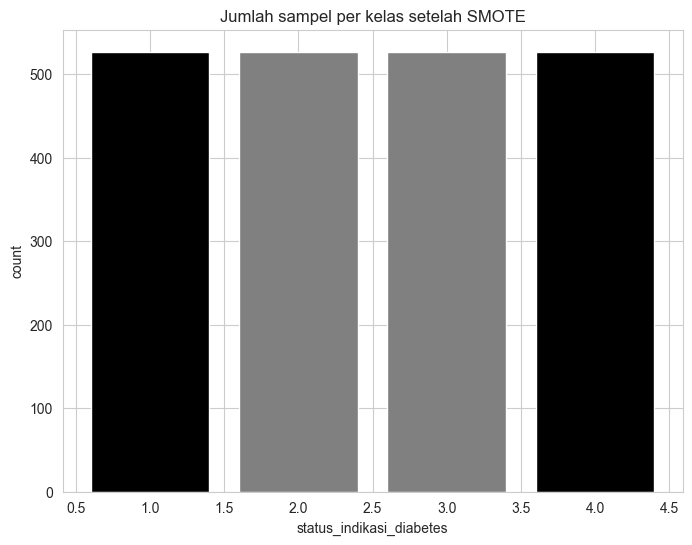

In [23]:
# Visualisasi after SMOTE
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values(), color =['grey', 'black'])
plt.title('Jumlah sampel per kelas setelah SMOTE')
plt.xlabel('status_indikasi_diabetes')
plt.ylabel('count')
plt.show()

In [24]:
#Gaussian Base-SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

gsmote = BorderlineSMOTE(kind="borderline-1", random_state=42)
X_train_gsmote, y_train_gsmote = gsmote.fit_resample(feature_norm.drop(columns=['status_indikasi_diabetes'])
, feature_norm['status_indikasi_diabetes'])
print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_train_gsmote))

Jumlah sampel per kelas setelah SMOTE: Counter({3: 527, 1: 527, 2: 527, 4: 527})


**Gaussian Base-SMOTE**

**Cara kerja**

Import Library:

    from collections import Counter: Mengimpor modul Counter untuk menghitung jumlah sampel di setiap kelas.
    from imblearn.over_sampling import SMOTE, BorderlineSMOTE: Mengimpor kelas SMOTE dan BorderlineSMOTE dari library imblearn yang digunakan untuk teknik oversampling.

Inisialisasi Gaussian Base-SMOTE:

    gsmote = BorderlineSMOTE(kind="borderline-1", random_state=42): Membuat objek BorderlineSMOTE dengan jenis "borderline-1" dan random_state 42.
    kind="borderline-1": Menentukan jenis Gaussian Base-SMOTE yang digunakan. "borderline-1" berfokus pada sampel minoritas yang berada di dekat batas keputusan.
    random_state=42: Menentukan seed untuk generator angka acak, memastikan bahwa hasil oversampling dapat direproduksi.

Menerapkan Gaussian Base-SMOTE:

    X_train_gsmote, y_train_gsmote = gsmote.fit_resample(feature_norm.drop(columns=['status_indikasi_diabetes']), feature_norm['status_indikasi_diabetes']): Menerapkan Gaussian Base-SMOTE pada dataset.
    feature_norm.drop(columns=['status_indikasi_diabetes']): Memilih semua fitur (kolom) dalam dataset kecuali kolom 'status_indikasi_diabetes', yang merupakan variabel target.
    feature_norm['status_indikasi_diabetes']: Memilih kolom 'status_indikasi_diabetes' sebagai variabel target.
    fit_resample: Metode ini melatih objek gsmote pada data dan menghasilkan sampel sintetis baru untuk kelas minoritas, sehingga menyeimbangkan dataset.

Menampilkan Hasil:

    print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_train_gsmote)): Mencetak jumlah sampel di setiap kelas setelah Gaussian Base-SMOTE diterapkan. Ini membantu Anda untuk melihat bagaimana distribusi kelas telah berubah dan apakah dataset sekarang lebih seimbang.

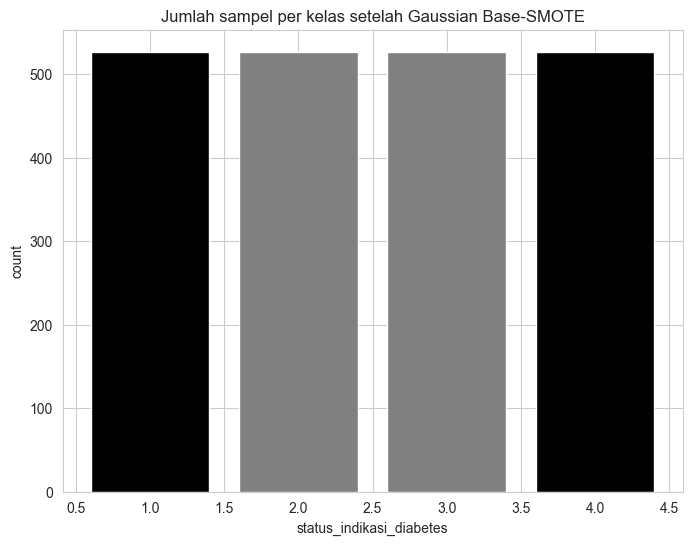

In [25]:
# Visualisasi after Gaussian Base-SMOTE
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values(), color=['grey', 'black'])
plt.title('Jumlah sampel per kelas setelah Gaussian Base-SMOTE')
plt.xlabel('status_indikasi_diabetes')
plt.ylabel('count')
plt.show()

Index(['polidipsia', 'poliuria', 'luka_lamban_sembuh', 'berat_badan_turun',
       'gdp', 'gds'],
      dtype='object')


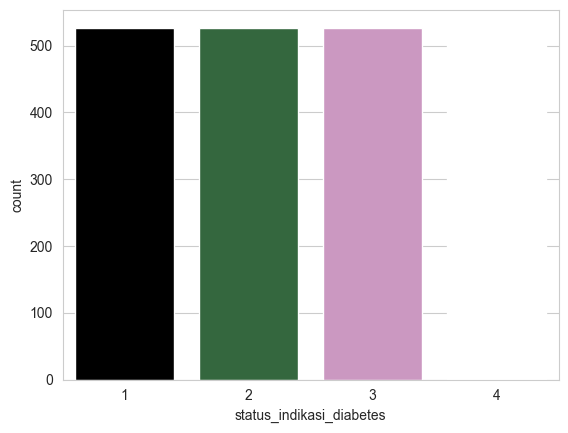

In [26]:
print(X_train_gsmote.columns)
sns.set_style('whitegrid')
sns.countplot(x=y_train_gsmote, data=X_train_gsmote, palette='cubehelix', hue=y_train_gsmote, legend=False)
X_train_gsmote.columns[0:10]
X_train_gsmote['status_indikasi_diabetes']= y_train_gsmote

**EDA**

Dengan melihat apakah ada perbedaan sebaran nilai yang mencolok, kita bisa mendapatkan gambaran, atribut/variabel manakah yang secara umum kita duga bisa menjadi pembeda utama antara 4 kelas

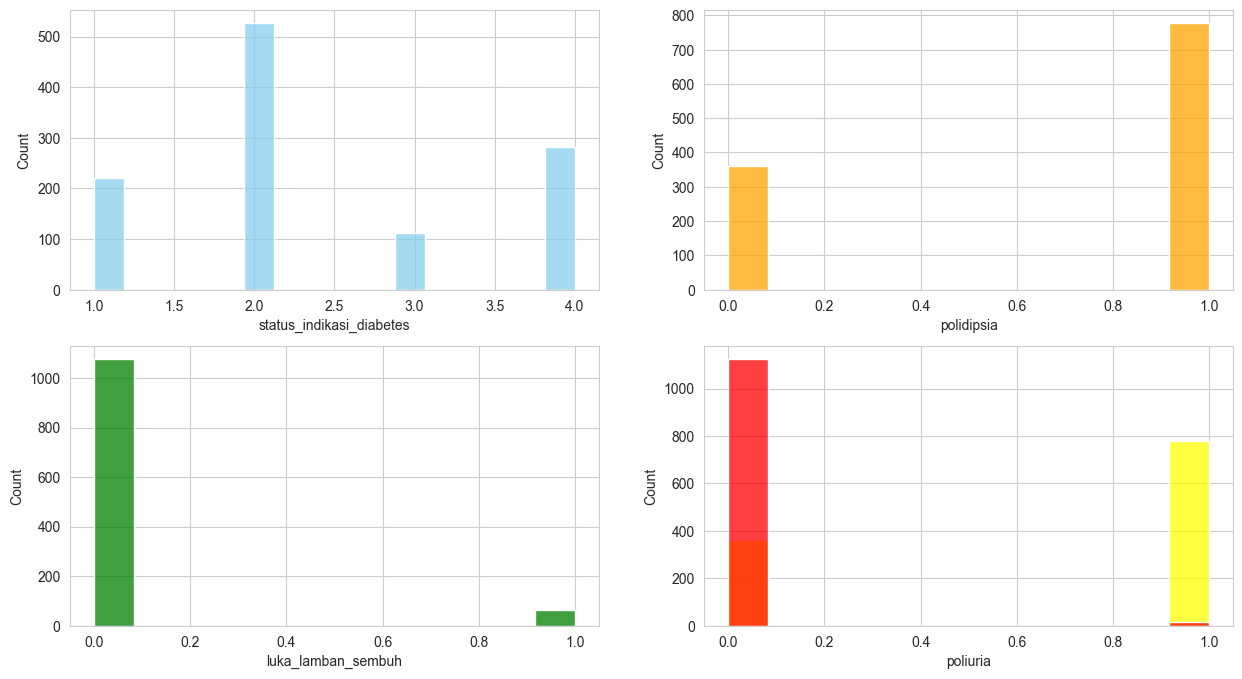

In [27]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.histplot(data=feature_norm, x='status_indikasi_diabetes', ax=axes[0,0], color='skyblue')
sns.histplot(data=feature_norm, x='poliuria', ax=axes[1,1], color='yellow')
sns.histplot(data=feature_norm, x='polidipsia', ax=axes[0,1], color='orange')
sns.histplot(data=feature_norm, x='luka_lamban_sembuh', ax=axes[1,0], color='green')
sns.histplot(data=feature_norm, x='berat_badan_turun', ax=axes[1,1], color='red')
plt.show()

Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot

C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_34552\4127713524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_indikasi_diabetes',y=l[i], data=feature_norm, palette='rainbow')
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_34552\4127713524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_indikasi_diabetes',y=l[i], data=feature_norm, palette='rainbow')
C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_34552\4127713524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_indikasi_diabetes',y=l[i], data=feature_no

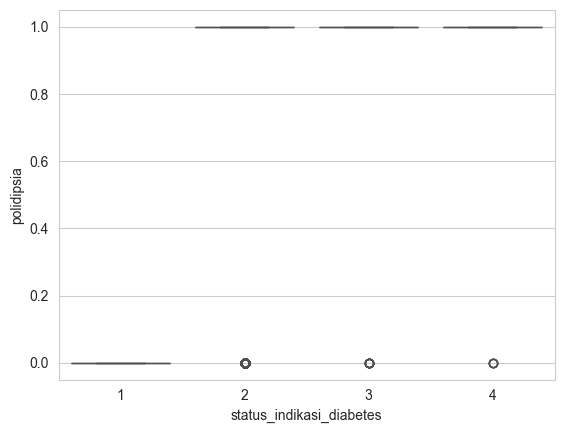

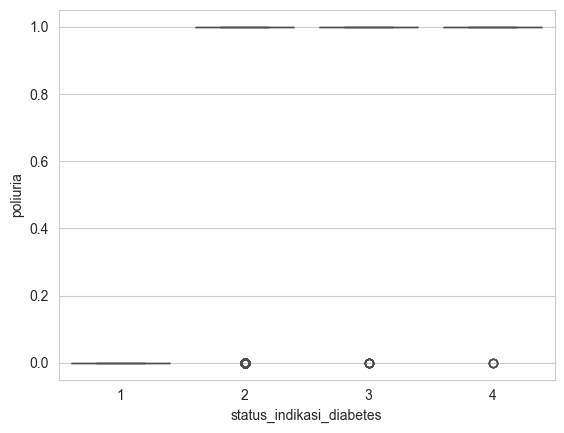

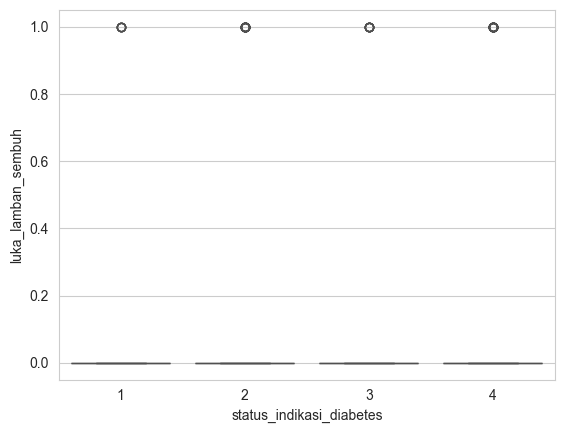

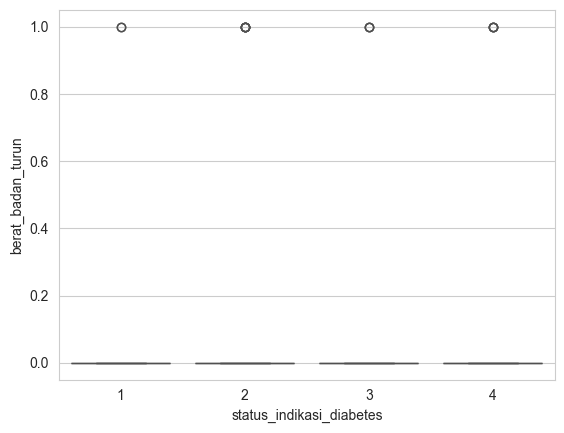

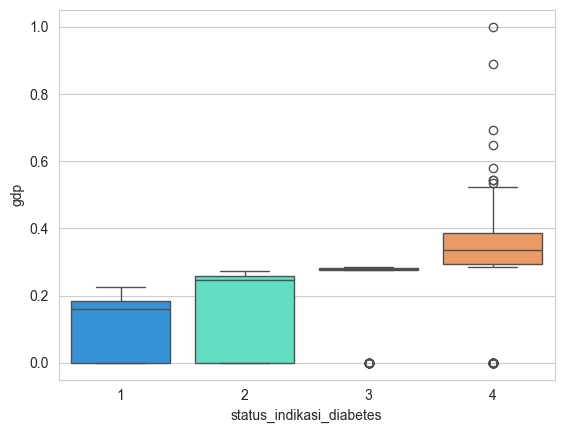

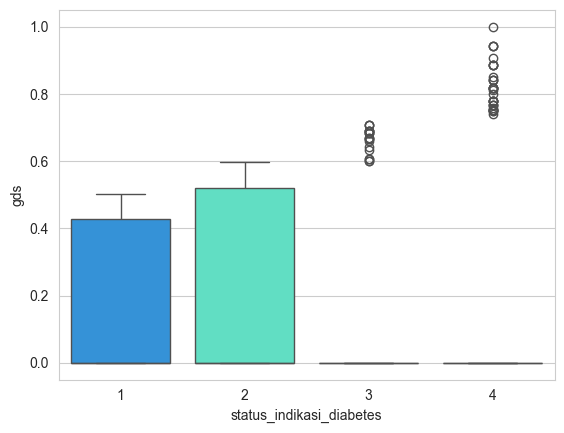

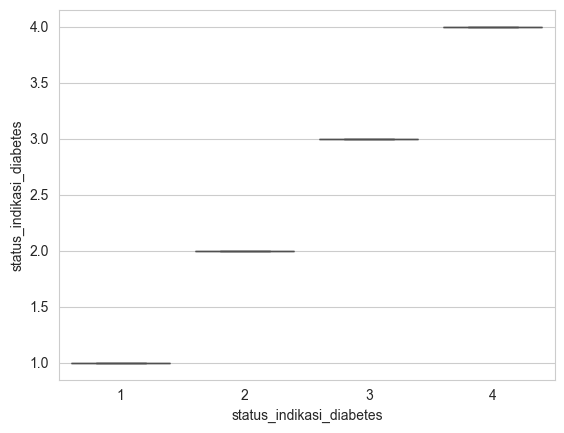

<Figure size 640x480 with 0 Axes>

In [28]:
l=list(feature_norm.columns[0:14])
for i in range(len(l)):
    sns.boxplot(x='status_indikasi_diabetes',y=l[i], data=feature_norm, palette='rainbow')
    plt.figure()

Menampilkan hubungan antar feature

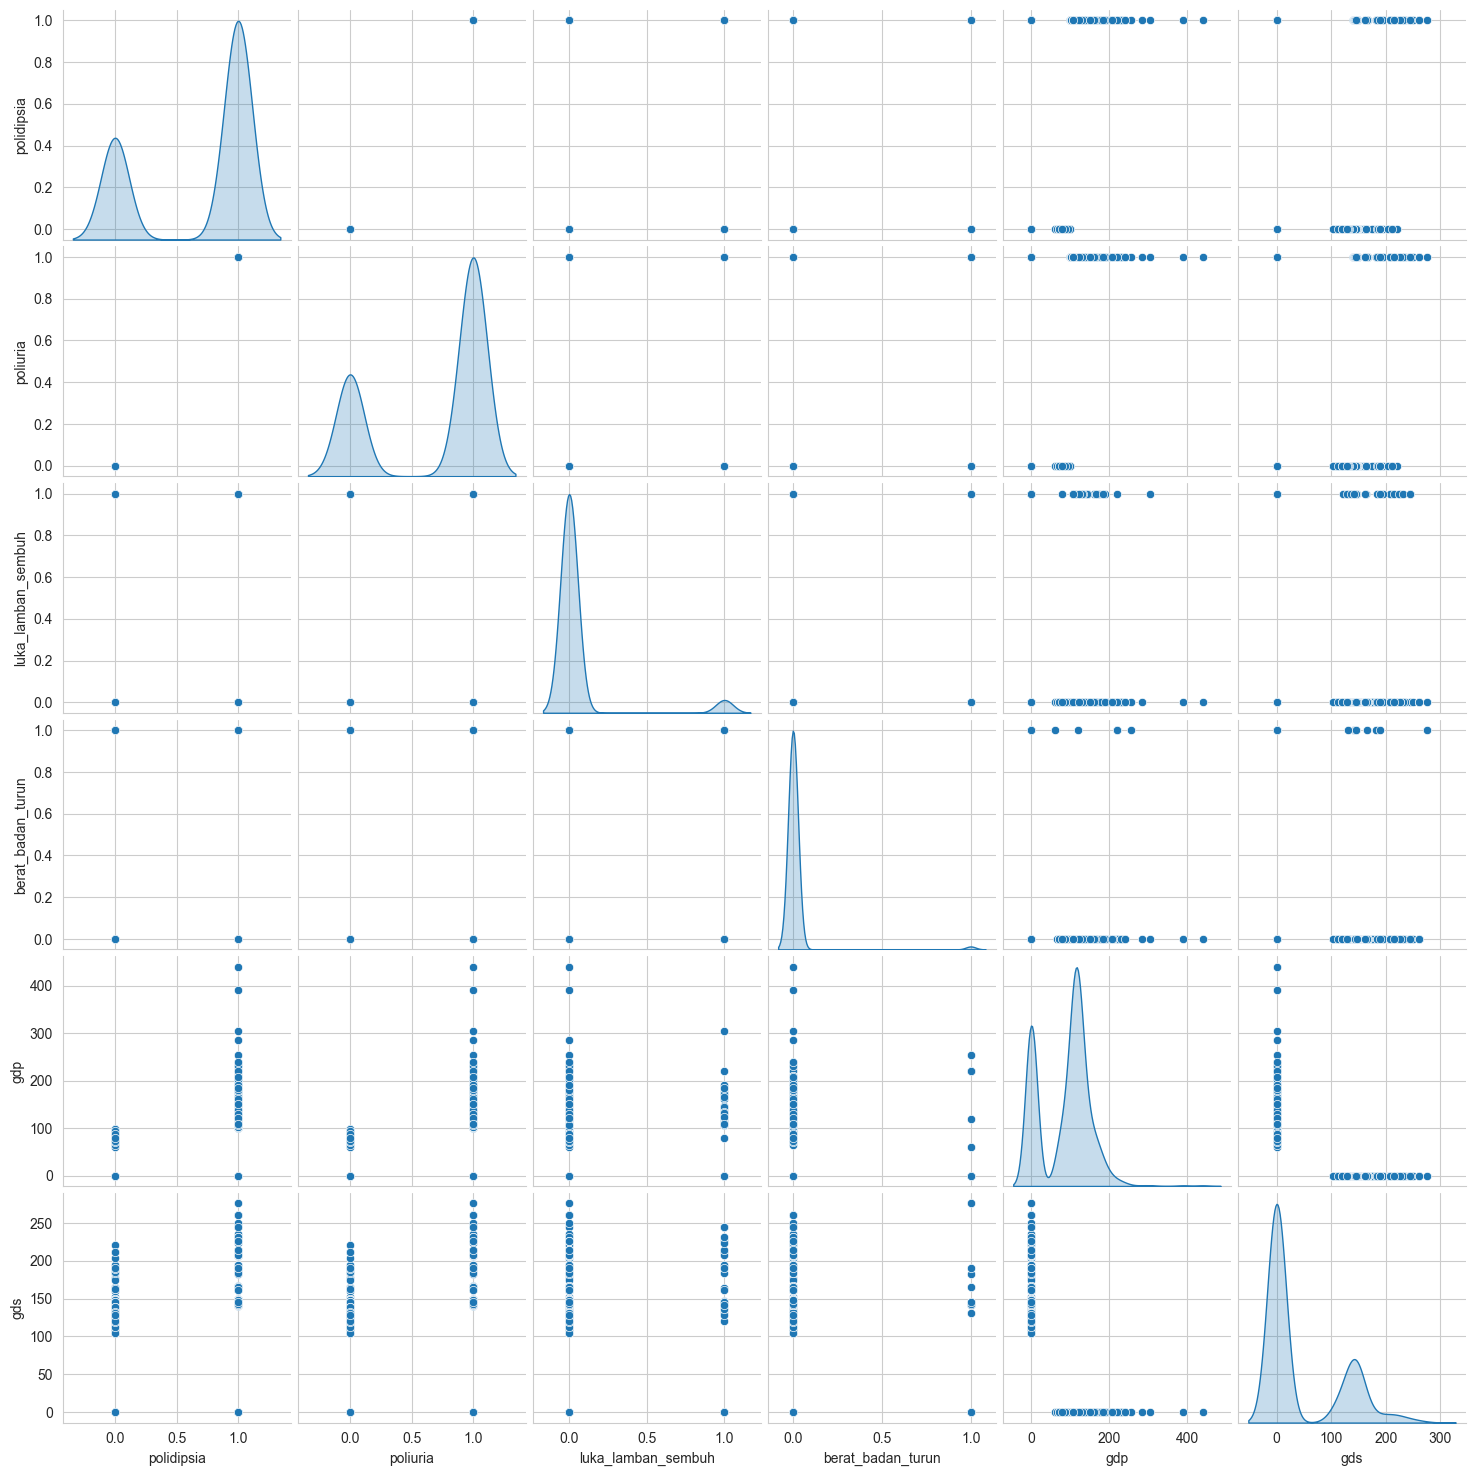

In [29]:
sns.pairplot(feature[['polidipsia', 'poliuria', 'luka_lamban_sembuh', 'berat_badan_turun', 'gdp', 'gds']], diag_kind='kde')

Bagaimana hubungan antar atribut tadi jika berdasarkan Status Indikasi Diabetes?

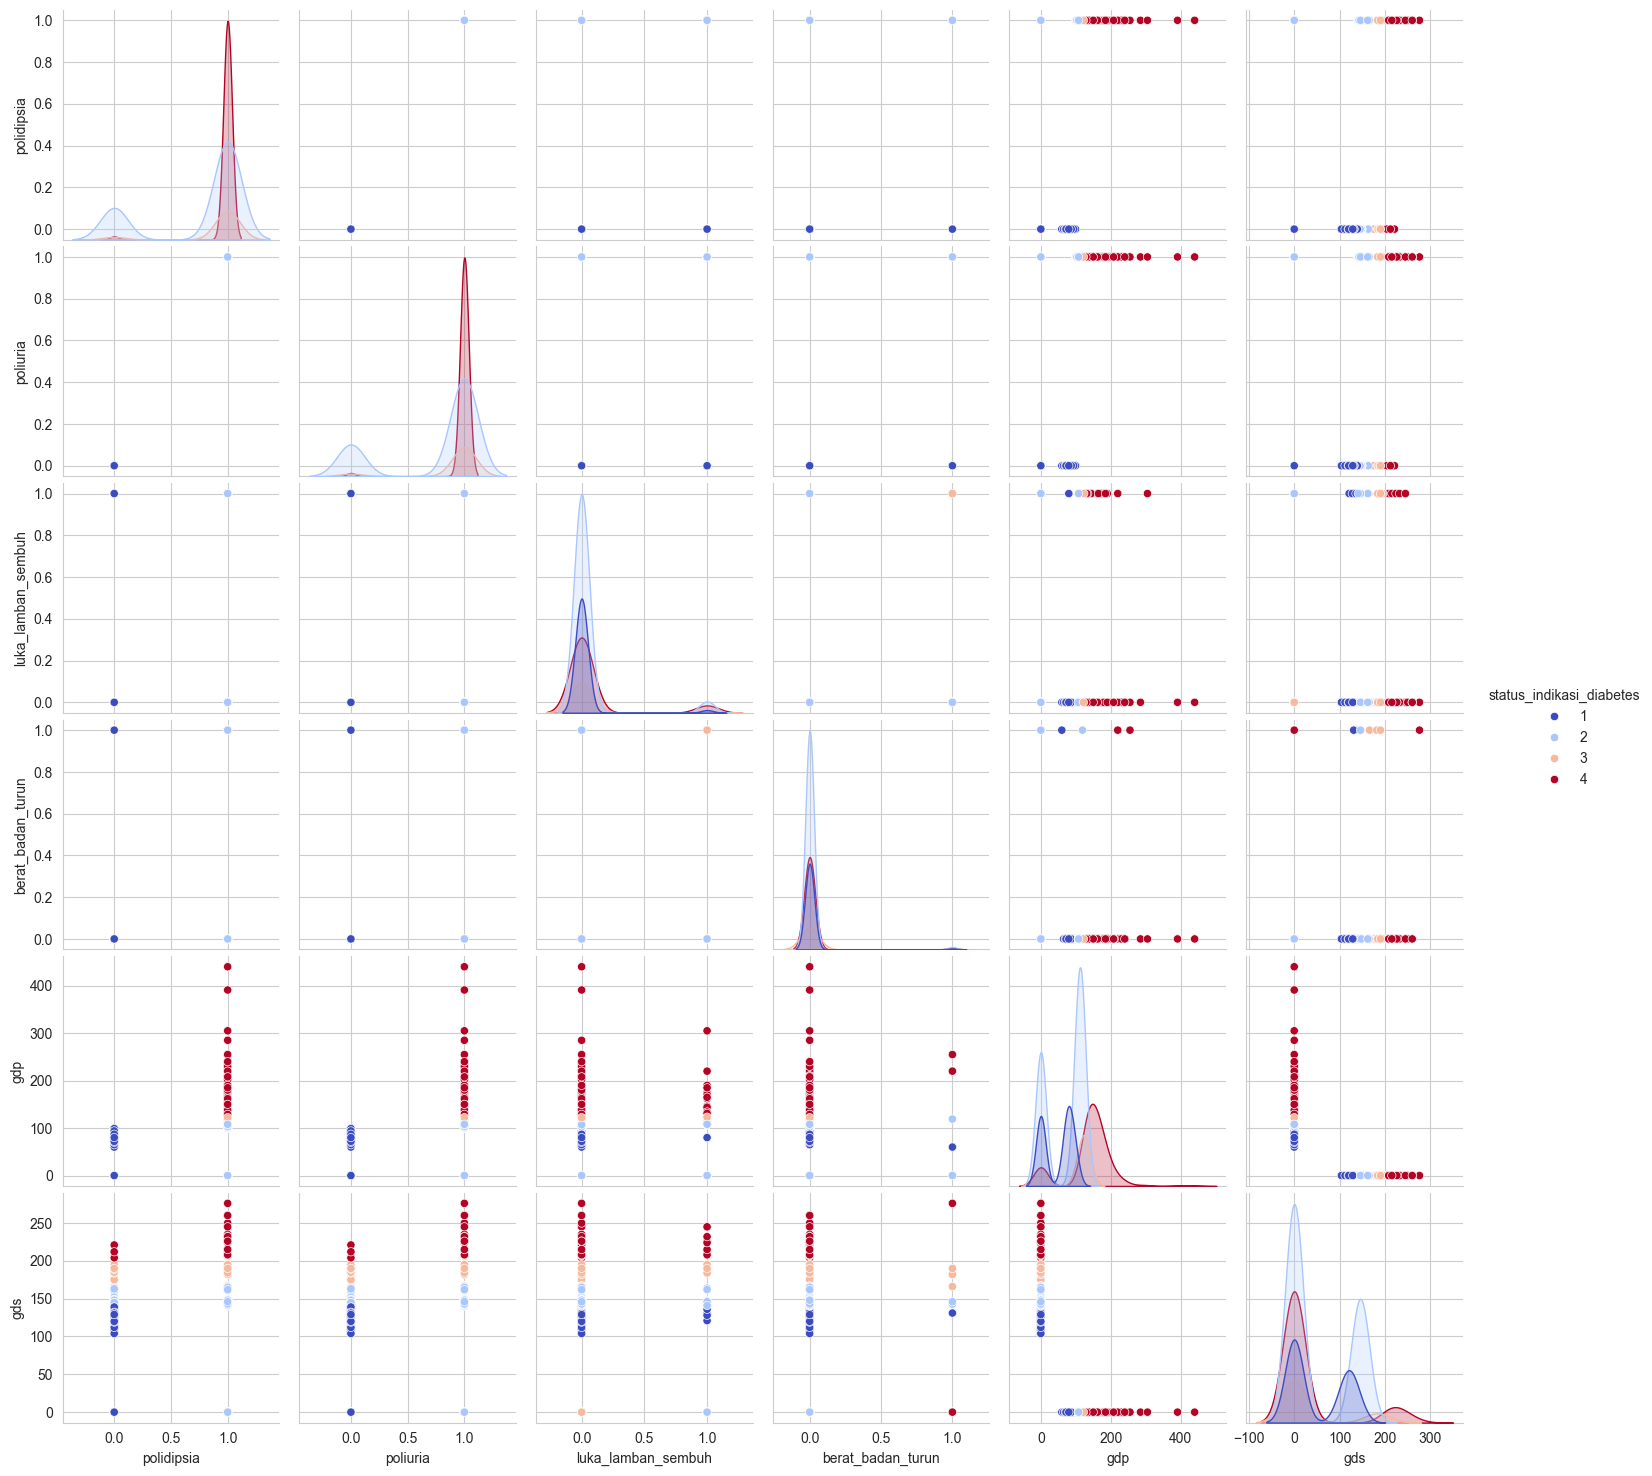

In [30]:
sns.pairplot(feature,hue='status_indikasi_diabetes', vars = ['polidipsia','poliuria','luka_lamban_sembuh','berat_badan_turun','gdp','gds'], palette = "coolwarm" )

Namun belum terlihat baik hubungan antar feature,jika berdasarkan status indikasi diabetes yang telah dilakukan normalisasi min-max dan balence data bagaimana?

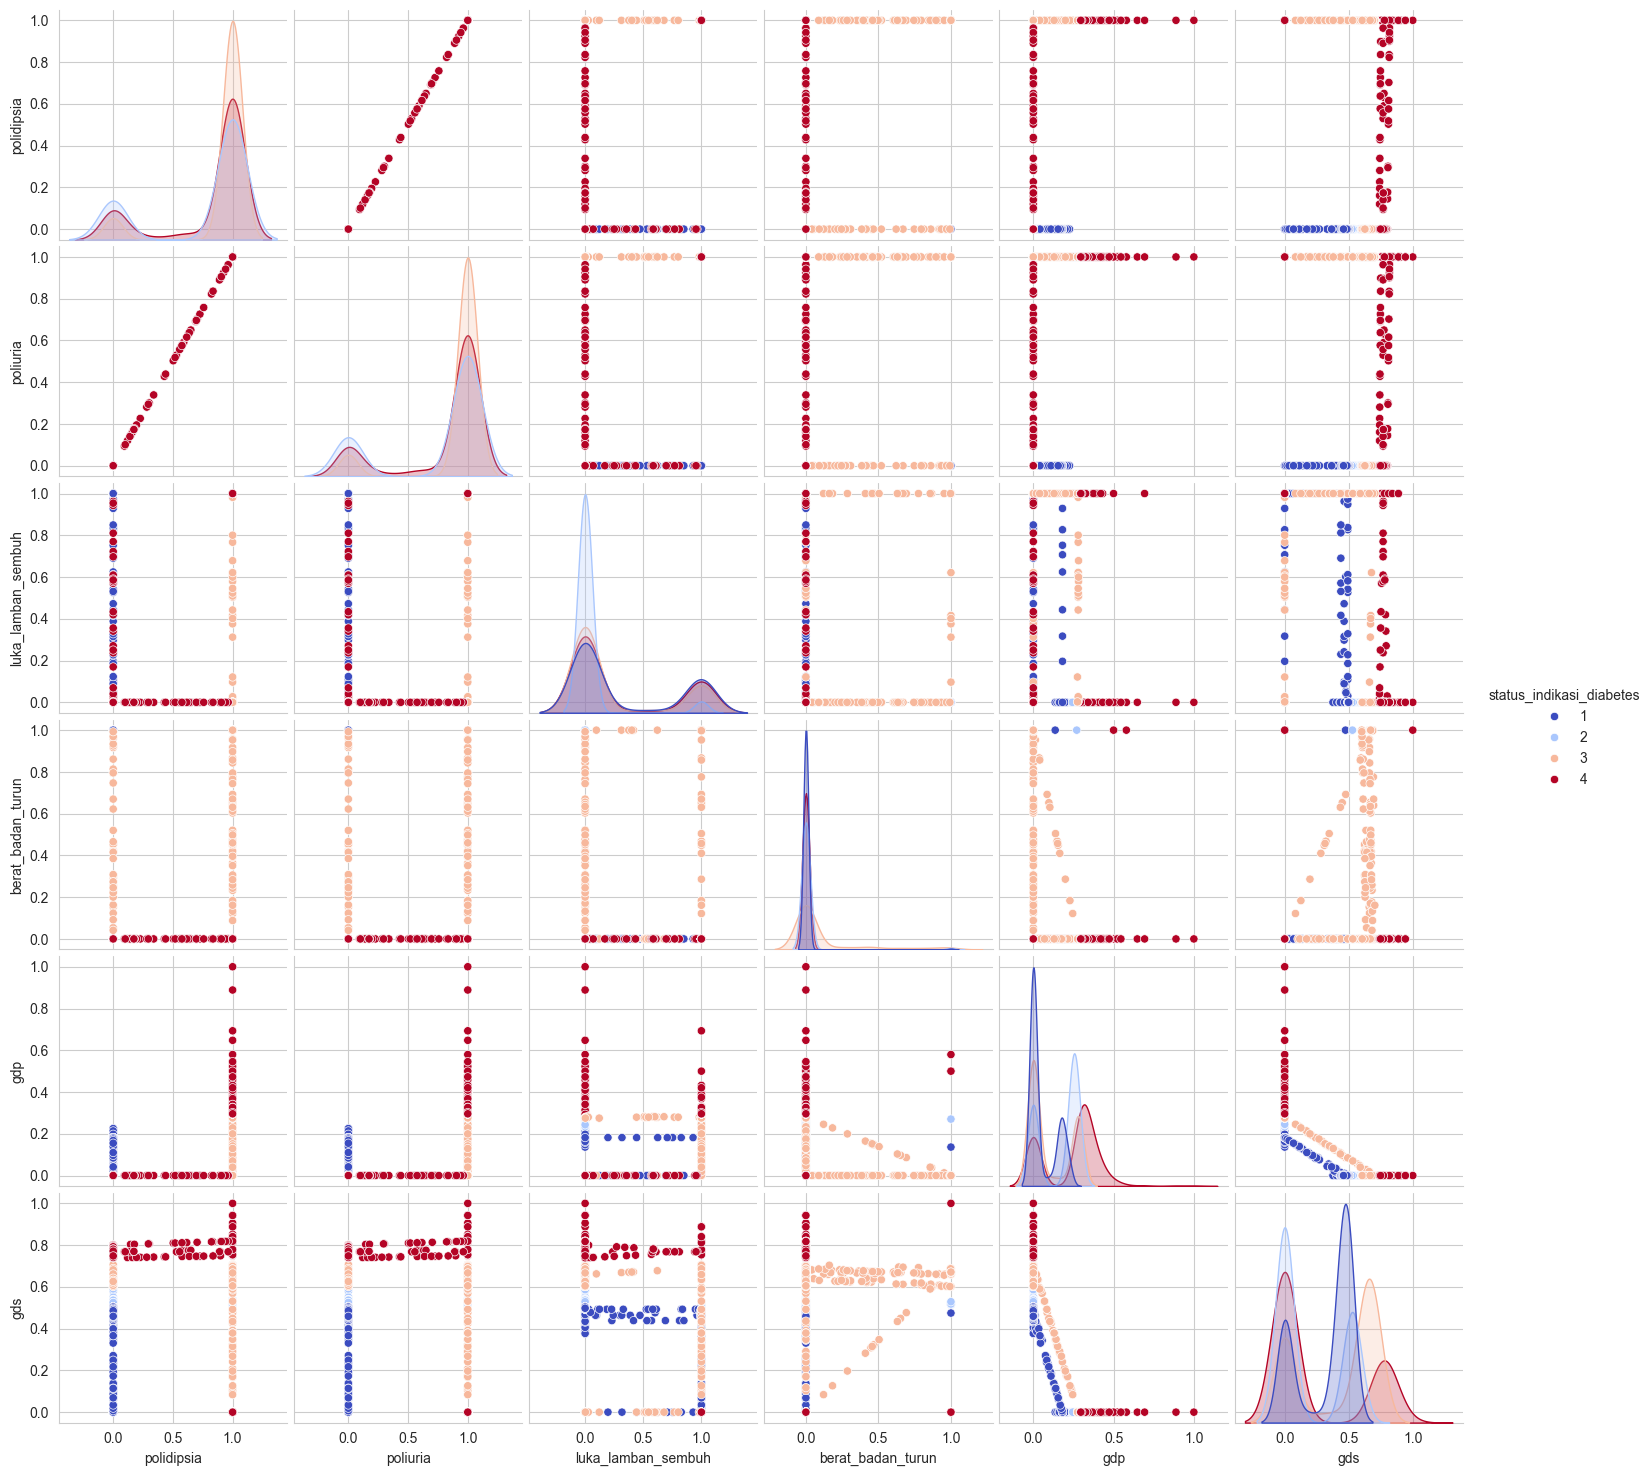

In [31]:
sns.pairplot(X_train_gsmote, hue = 'status_indikasi_diabetes',vars = ['polidipsia','poliuria','luka_lamban_sembuh','berat_badan_turun','gdp','gds'], palette = "coolwarm" )

**Pengecekan Korelasi**

Feature Original

<Axes: >

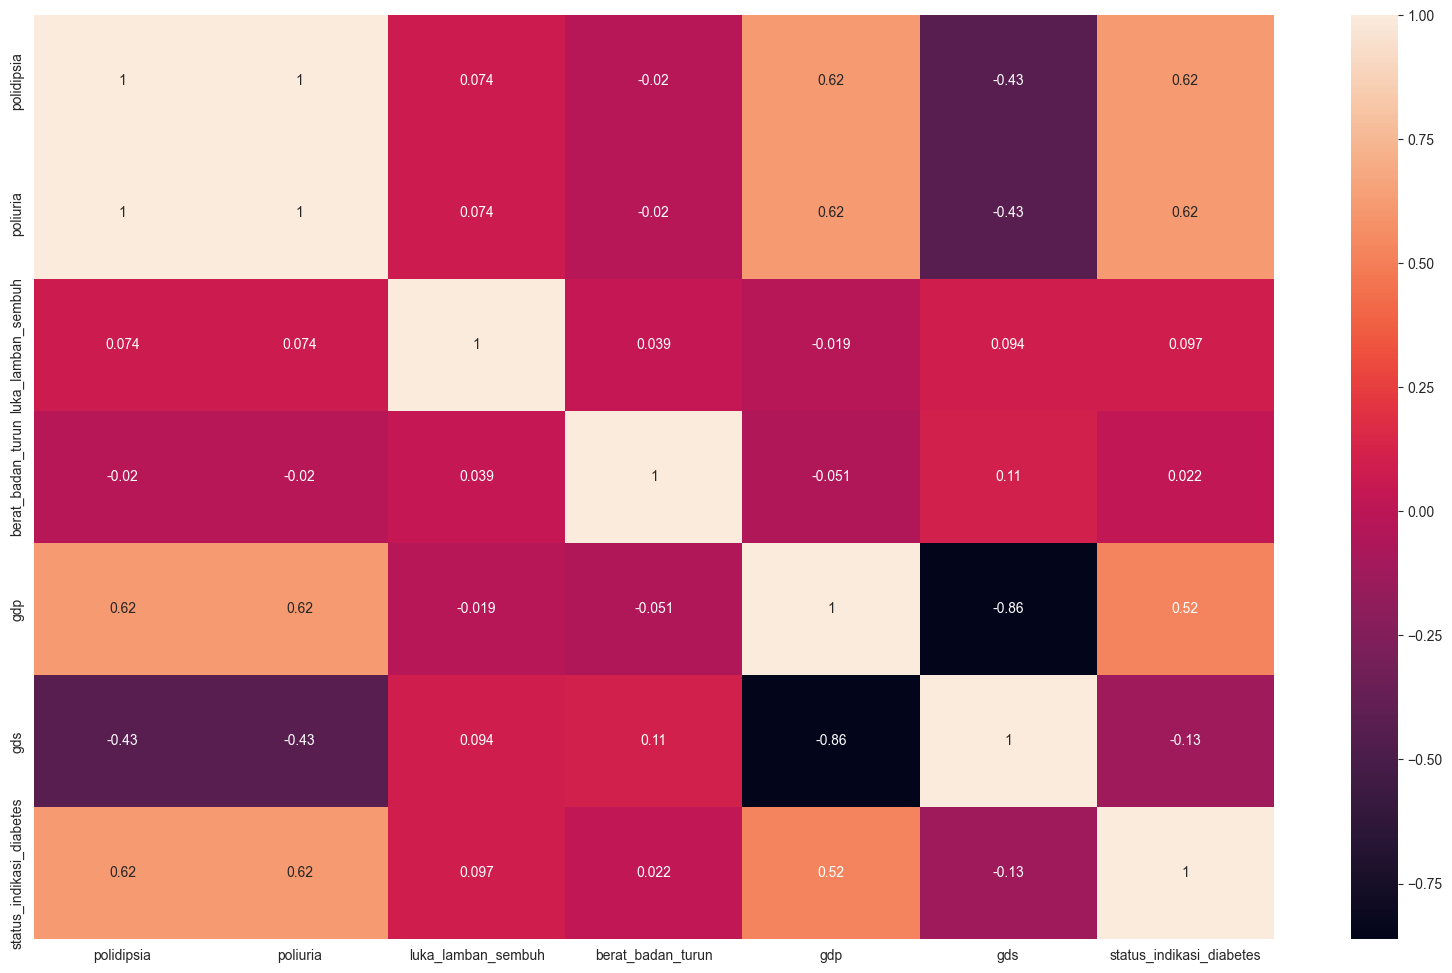

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(feature.corr(), annot=True)

Feature Normalisasi dan SMOTE

<Axes: >

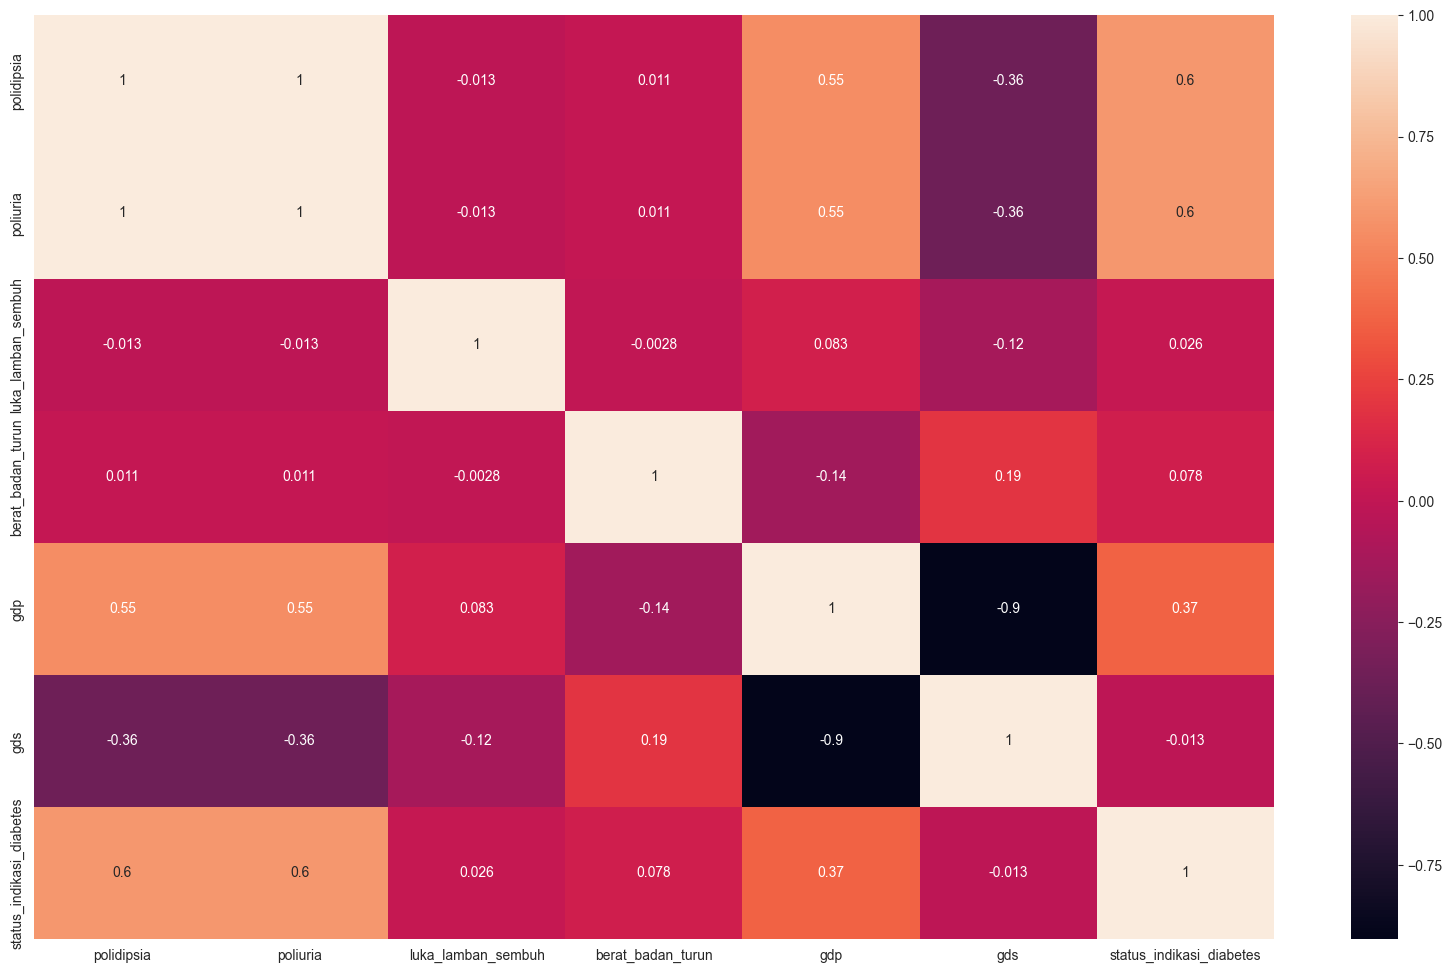

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_gsmote.corr(), annot=True)

##**Data Original**

In [34]:
#sebelum SMOTE
data_original = feature.drop(['status_indikasi_diabetes'], axis=1)
data_original.head()
#membuat variabel dependen dan variabel independen
label = feature["status_indikasi_diabetes"]
feature_1 = feature.drop(columns=['status_indikasi_diabetes'])
feature_1.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds
0,1,1,0,0,124,0
1,1,1,0,0,124,0
2,1,1,0,0,123,0
3,0,0,0,0,71,0
4,1,1,0,0,117,0


In [35]:
feature_1 = feature.drop(columns=['status_indikasi_diabetes'])
feature_1.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds
0,1,1,0,0,124,0
1,1,1,0,0,124,0
2,1,1,0,0,123,0
3,0,0,0,0,71,0
4,1,1,0,0,117,0


In [36]:
label =  feature["status_indikasi_diabetes"]
label.head()

0    3
1    3
2    3
3    1
4    2
Name: status_indikasi_diabetes, dtype: int64

# Dalam Penelitian ini dilakukan 3 kali pengulangan Split Data yaitu **70% trainning dan test 30%**, **75% trainning dan test 25%**, dan **80% trainning dan test 20%** untuk mendapatkan hasil akurasi yang tepat dalam prediksi



**Melakukan Trainning Model Random Forest dan MlpClassifier**

X_train: atribut-atribut data latih

X_test: atribut-atribut data uji

y_train: label/kelas data latih

y_test: label/kelas data uji

Data Trainning 70% dan Test 30%

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_1, label, test_size=0.30, random_state=42)

**Random Forest Calssifier**

algoritma machine learning yang populer untuk klasifikasi. Algoritma ini bekerja dengan membangun banyak pohon keputusan (decision tree) dan menggabungkan hasil prediksi mereka untuk menghasilkan prediksi akhir yang lebih akurat dan stabil.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisialisasi model Random Forest
rf_model70 = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth= 3, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model70.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Hitung jumlah prediksi dari semua pohon keputusan untuk setiap kelas. Kelas dengan prediksi terbanyak menjadi prediksi akhir

In [39]:
# Make predictions on the test data
y_pred = rf_model70.predict(X_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8830409356725146


In [41]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(feature_1.columns), "importance": rf_model70.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,gdp,0.494394
0,polidipsia,0.195753
5,gds,0.170901
1,poliuria,0.133150
3,berat_badan_turun,0.003841
2,luka_lamban_sembuh,0.001960


C:\Users\ELSANDE\AppData\Local\Temp\ipykernel_34552\1680764897.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kategori")


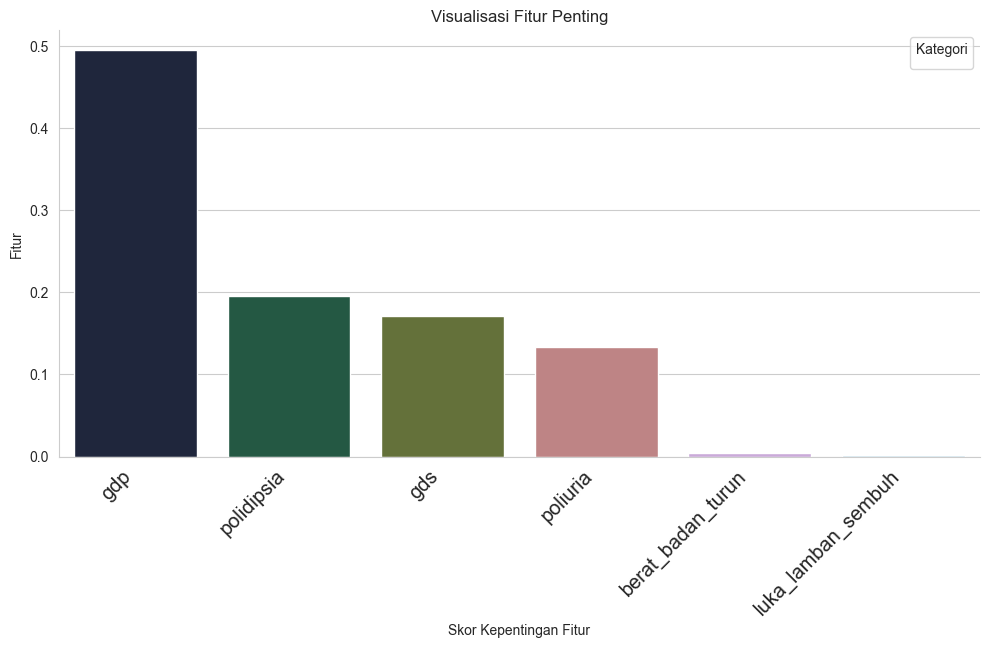

In [42]:
# visualize important featuers

# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)

plt.xlabel("Skor Kepentingan Fitur")
plt.ylabel("Fitur")
plt.title("Visualisasi Fitur Penting")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.legend(title="Kategori")
plt.show()

sklearn.metrics library Scikit-learn, fungsi-fungsi penting untuk evaluasi performa model machine learning khususnya untuk klasifikasi.
- classification_report, menghasilkan laporan klasifikasi yang mendetail.
- accuracy_score menghitung akurasi keseluruhan model klasifikasi
- confusion_matrix, membuat tabel matriks konfusi
- ConfusionMatrixDisplay, plot matriks konfusi yang lebih informatif dan mudah dibaca.

In [43]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

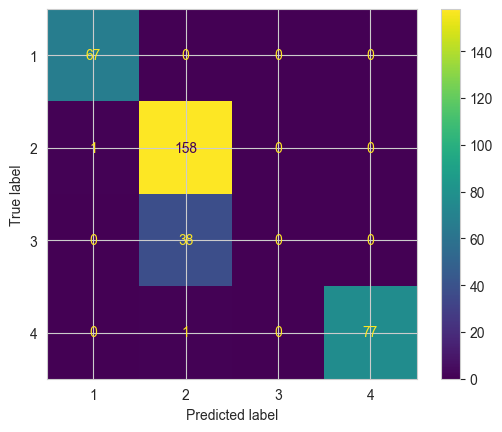

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model70.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model70.classes_)
disp.plot()
plt.show()

In [45]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.8830409356725146
Confusion Matrix: [[ 67   0   0   0]
 [  1 158   0   0]
 [  0  38   0   0]
 [  0   1   0  77]]
Classification Report:               precision    recall  f1-score   support

           1       0.99      1.00      0.99        67
           2       0.80      0.99      0.89       159
           3       0.00      0.00      0.00        38
           4       1.00      0.99      0.99        78

    accuracy                           0.88       342
   macro avg       0.70      0.75      0.72       342
weighted avg       0.79      0.88      0.83       342



c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Data Trainning 80% dan Test 20%



In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_1, label, test_size=0.20, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisialisasi model Random Forest
rf_model80 = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth= 3, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model80.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [48]:
# Make predictions on the test data
y_pred = rf_model80.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9780701754385965


In [50]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(feature_1.columns), "importance": rf_model80.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,gdp,0.506255
0,polidipsia,0.185559
5,gds,0.170830
1,poliuria,0.131743
3,berat_badan_turun,0.003109
2,luka_lamban_sembuh,0.002505


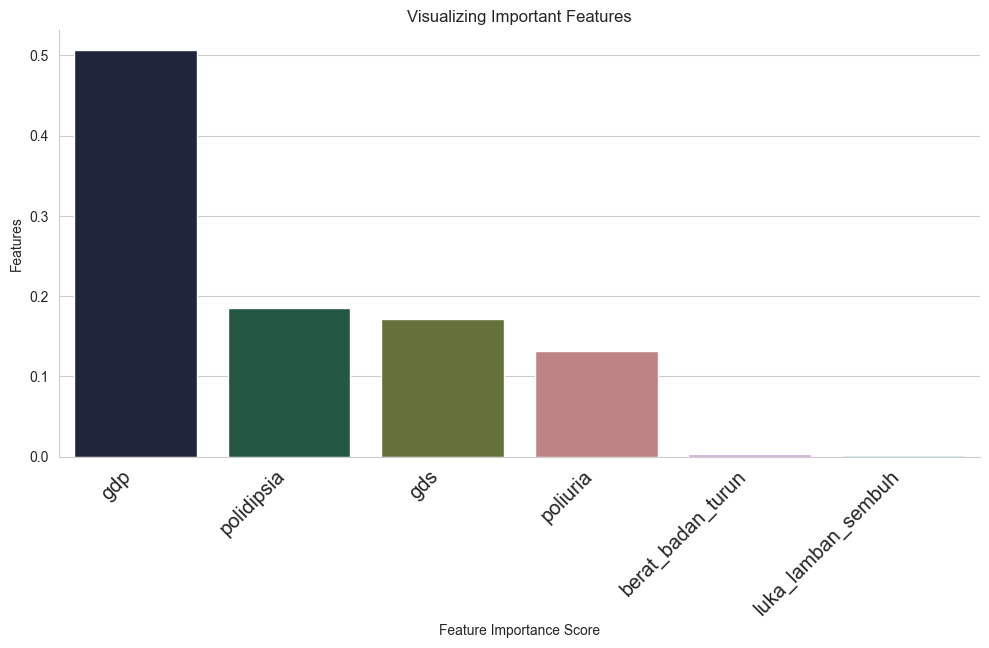

In [51]:
# visualize important featuers

# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

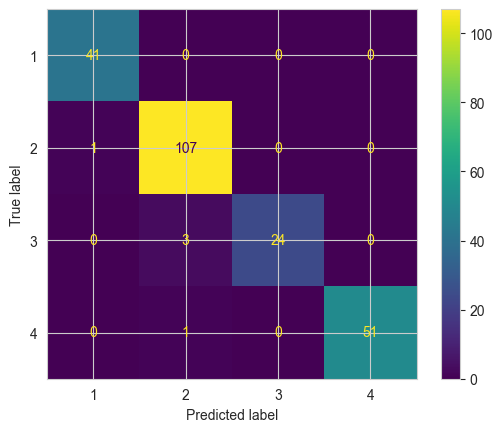

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model80.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model80.classes_)
disp.plot()
plt.show()

In [53]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9780701754385965
Confusion Matrix: [[ 41   0   0   0]
 [  1 107   0   0]
 [  0   3  24   0]
 [  0   1   0  51]]
Classification Report:               precision    recall  f1-score   support

           1       0.98      1.00      0.99        41
           2       0.96      0.99      0.98       108
           3       1.00      0.89      0.94        27
           4       1.00      0.98      0.99        52

    accuracy                           0.98       228
   macro avg       0.99      0.97      0.97       228
weighted avg       0.98      0.98      0.98       228



Data Trainning 75% dan Test 25%

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_1, label, test_size=0.25, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisialisasi model Random Forest
rf_model75 = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth= 3, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model75.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [56]:
# Make predictions on the test data
y_pred = rf_model75.predict(X_test)

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8701754385964913


In [58]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(feature_1.columns), "importance": rf_model75.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,gdp,0.491754
0,polidipsia,0.186911
5,gds,0.176192
1,poliuria,0.138914
3,berat_badan_turun,0.003607
2,luka_lamban_sembuh,0.002623


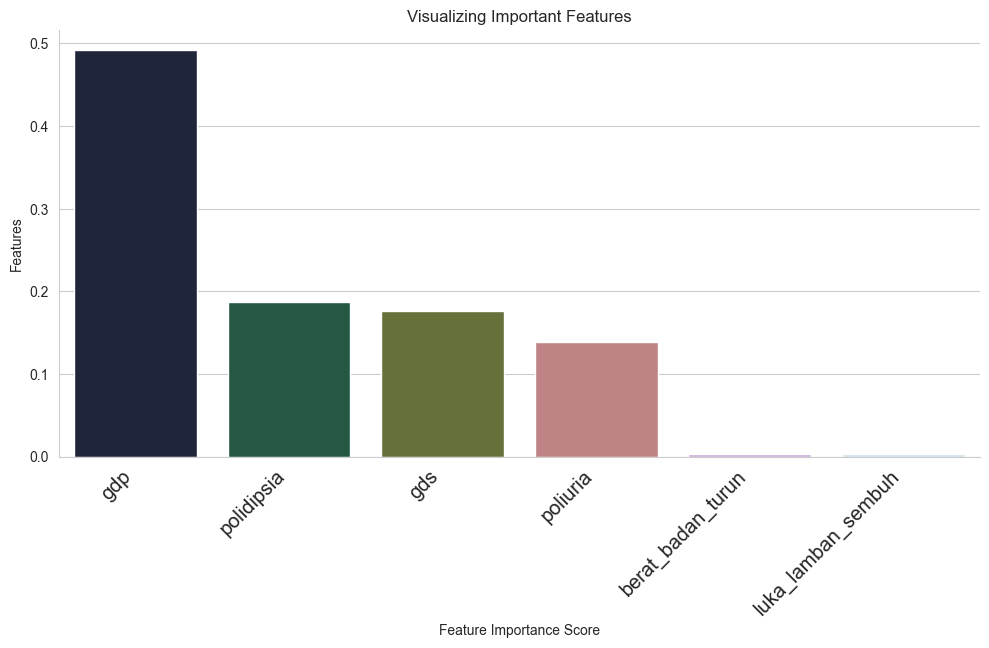

In [59]:
# visualize important featuers

# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [60]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

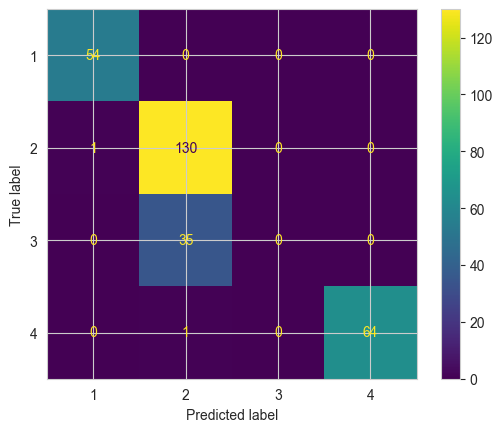

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model75.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model75.classes_)
disp.plot()
plt.show()

In [62]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.8701754385964913
Confusion Matrix: [[ 54   0   0   0]
 [  1 130   0   0]
 [  0  35   0   0]
 [  0   1   0  64]]
Classification Report:               precision    recall  f1-score   support

           1       0.98      1.00      0.99        54
           2       0.78      0.99      0.88       131
           3       0.00      0.00      0.00        35
           4       1.00      0.98      0.99        65

    accuracy                           0.87       285
   macro avg       0.69      0.74      0.71       285
weighted avg       0.77      0.87      0.82       285



c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELSANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

##**Data Yang Telah Normalisasi dan SMOTE**

In [63]:
df_feat = X_train_gsmote.drop(['status_indikasi_diabetes'], axis=1)
df_feat.head()

,polidipsia,poliuria,luka_lamban_sembuh,berat_badan_turun,gdp,gds
0,1.0,1.0,0.0,0.0,0.281818,0.0
1,1.0,1.0,0.0,0.0,0.281818,0.0
2,1.0,1.0,0.0,0.0,0.279545,0.0
3,0.0,0.0,0.0,0.0,0.161364,0.0
4,1.0,1.0,0.0,0.0,0.265909,0.0


In [64]:
df_target = X_train_gsmote['status_indikasi_diabetes']
df_target.head()

0    3
1    3
2    3
3    1
4    2
Name: status_indikasi_diabetes, dtype: int64

Split Data, Trainning 70% dan Test 30%

In [65]:
# Proporsi yang digunakan adalah 75% untuk training dan 25% untuk testing secara acak.
# Karena pembagian dilakukan secara acak maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=42)

In [66]:
# Inisialisasi model Random Forest
rf_model70 = RandomForestClassifier(n_estimators=100, max_depth = 5, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model70.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [67]:
# Make predictions on the test data
y_pred = rf_model70.predict(X_test)

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9921011058451816


In [69]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(feature_1.columns), "importance": rf_model70.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,gdp,0.324955
5,gds,0.323231
0,polidipsia,0.148638
1,poliuria,0.126620
2,luka_lamban_sembuh,0.044642
3,berat_badan_turun,0.031914


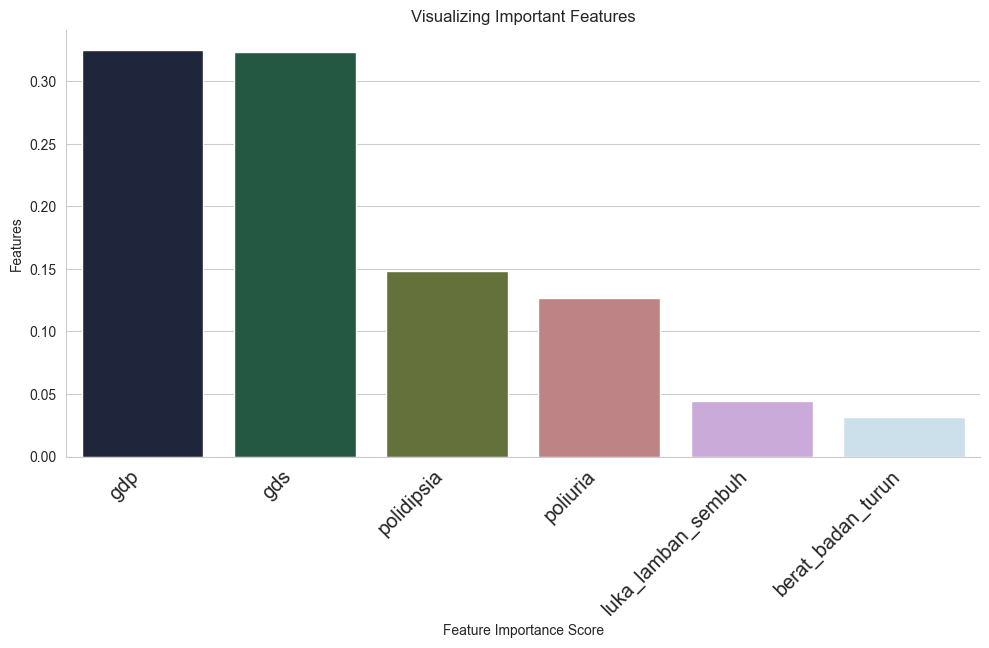

In [70]:
# visualize important featuers

# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

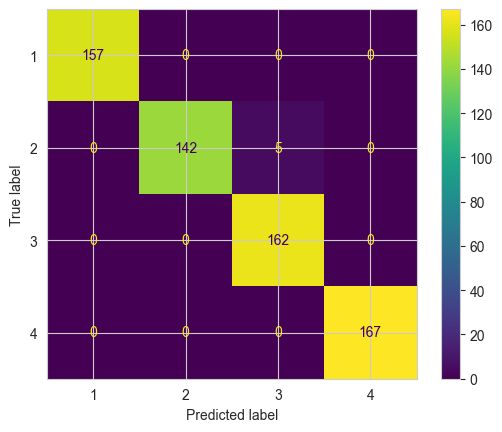

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model70.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model70.classes_)
disp.plot()
plt.show()

In [72]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9921011058451816
Confusion Matrix: [[157   0   0   0]
 [  0 142   5   0]
 [  0   0 162   0]
 [  0   0   0 167]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       157
           2       1.00      0.97      0.98       147
           3       0.97      1.00      0.98       162
           4       1.00      1.00      1.00       167

    accuracy                           0.99       633
   macro avg       0.99      0.99      0.99       633
weighted avg       0.99      0.99      0.99       633



Split Data, Trainning 80% dan Test 20%

In [73]:
# Proporsi yang digunakan adalah 75% untuk training dan 25% untuk testing secara acak.
# Karena pembagian dilakukan secara acak maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.20, random_state=42)

In [74]:
# Inisialisasi model Random Forest
rf_model80 = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth= 5, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model80.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [75]:
# Make predictions on the test data
y_pred = rf_model80.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9881516587677726


In [77]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(feature_1.columns), "importance": rf_model80.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
5,gds,0.330281
4,gdp,0.328116
0,polidipsia,0.147786
1,poliuria,0.119837
2,luka_lamban_sembuh,0.042870
3,berat_badan_turun,0.031110


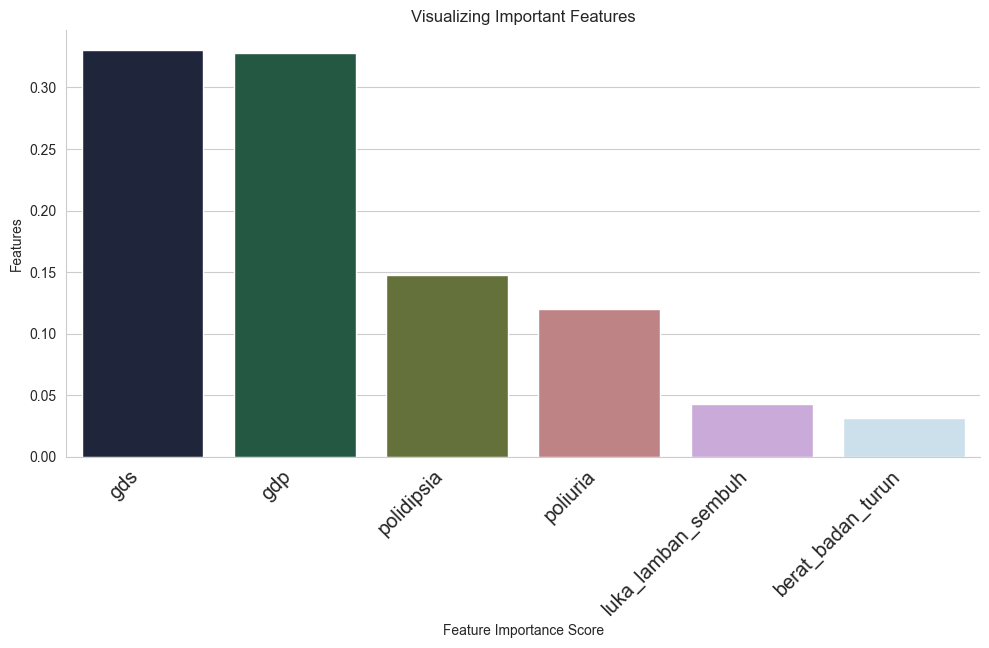

In [78]:
# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

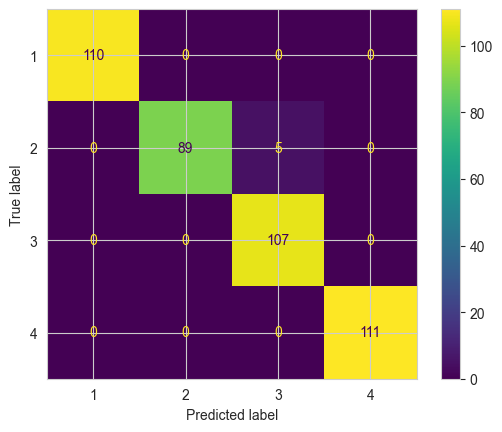

In [79]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model80.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model80.classes_)
disp.plot()
plt.show()

In [80]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9881516587677726
Confusion Matrix: [[110   0   0   0]
 [  0  89   5   0]
 [  0   0 107   0]
 [  0   0   0 111]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       110
           2       1.00      0.95      0.97        94
           3       0.96      1.00      0.98       107
           4       1.00      1.00      1.00       111

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422



Split Data, Trainning 75% dan Test 25%

In [81]:
# Proporsi yang digunakan adalah 75% untuk training dan 25% untuk testing secara acak.
# Karena pembagian dilakukan secara acak maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.25, random_state=42)

In [82]:
# Inisialisasi model Random Forest
rf_model75 = RandomForestClassifier(n_estimators=100 ,criterion='gini', max_depth= 5, bootstrap = True, random_state=42)

# Train the model on the training data
rf_model75.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [83]:
# Make predictions on the test data
y_pred = rf_model75.predict(X_test)

In [84]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9905123339658444


In [85]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(df_feat.columns), "importance": rf_model75.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,gdp,0.333647
5,gds,0.316993
0,polidipsia,0.151913
1,poliuria,0.120750
2,luka_lamban_sembuh,0.044800
3,berat_badan_turun,0.031897


**Feature Importance Random Forest Classifier**

Fitur yang lebih sering digunakan untuk membuat pemisahan yang baik dan menghasilkan pengurangan impurity yang besar akan memiliki feature importance yang lebih tinggi.

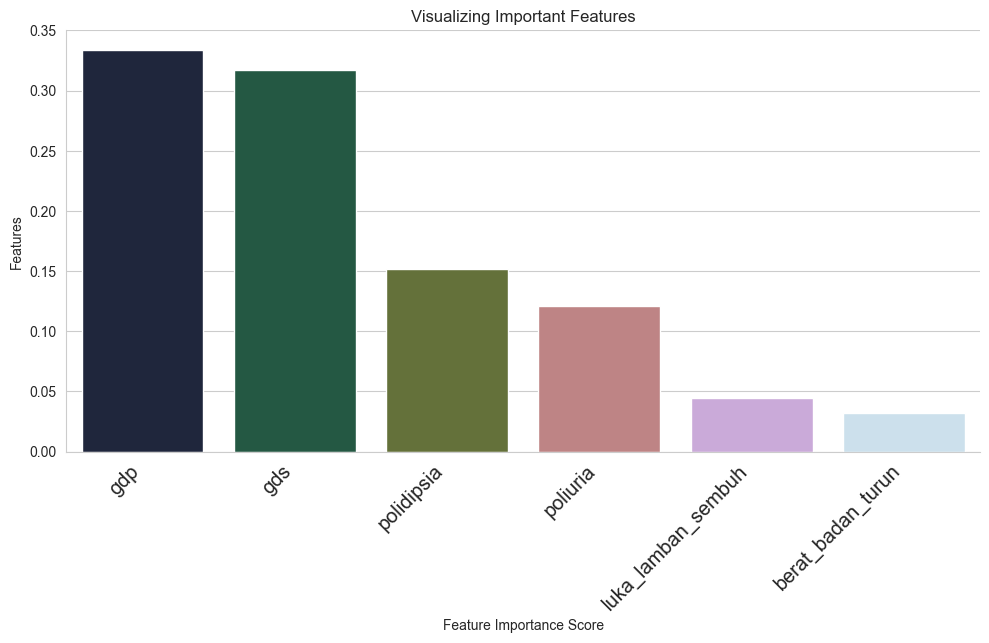

In [86]:
# visualize important featuers

# Creating a bar plot
sns.catplot(
    data=feature_importances_df,
    x='feature',
    y='importance',
    hue='feature',
    kind='bar',
    palette='cubehelix',
    height=5,
    aspect=2
)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

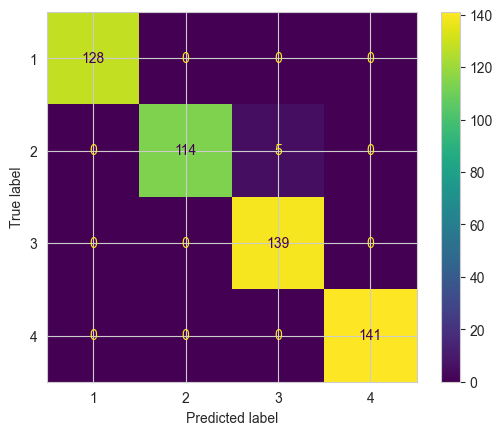

In [87]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model75.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model75.classes_)
disp.plot()
plt.show()

Menghitung Accuracy, Precision, Recall, dan F1-Score

In [88]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9905123339658444
Confusion Matrix: [[128   0   0   0]
 [  0 114   5   0]
 [  0   0 139   0]
 [  0   0   0 141]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      0.96      0.98       119
           3       0.97      1.00      0.98       139
           4       1.00      1.00      1.00       141

    accuracy                           0.99       527
   macro avg       0.99      0.99      0.99       527
weighted avg       0.99      0.99      0.99       527



**MLPCalssifier**

**Algorithm Multi Layer-Perceptron Classifier**
 algoritma machine learning yang termasuk dalam kategori jaringan saraf tiruan (JST). Algoritma ini terinspirasi dari struktur dan fungsi otak manusia dan digunakan untuk menyelesaikan tugas klasifikasi.

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Split Data Trinning 75% dan Teat 25%

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.25, random_state=42)

In [91]:
# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,  50), early_stopping=True, max_iter=500)

In [92]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500)

In [93]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7400379506641366


In [95]:
def permutation_importance(df_feat, df_target, mlp):
    # Convert DataFrame to NumPy array
    df_feat = df_feat.values
    importance = np.zeros(df_feat.shape[1])
    for col in range(df_feat.shape[1]):
        original_col = df_feat[:, col]
        df_feat[:, col] = np.random.permutation(original_col)
        mlp.fit(df_feat, df_target)
        pred = mlp.predict(df_feat)
        acc = accuracy_score(df_target, pred)
        df_feat[:, col] = original_col
        importance[col] = acc

    return importance

In [96]:
# Calculate feature importance
feature_importance = permutation_importance(X_train, y_train, mlp)

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
sorted_features = df_feat.columns[sorted_idx]

# Print the top 6 most important features
print("Top 6 most important features:")
for i in range(6):
    print(f"{i + 1}. {sorted_features[i]}")



Top 6 most important features:
1. luka_lamban_sembuh
2. poliuria
3. polidipsia
4. berat_badan_turun
5. gdp
6. gds


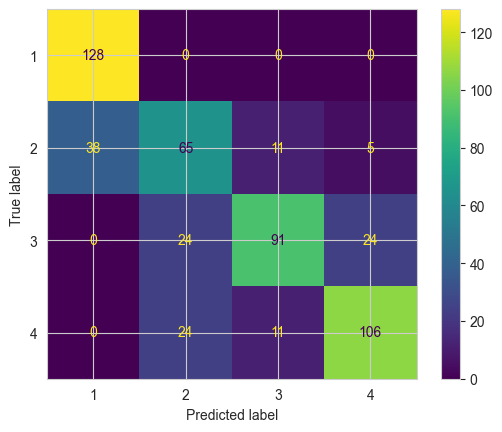

In [97]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model75.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model75.classes_)
disp.plot()
plt.show()

Menghitung Accuracy, Precision, Recall, dan F1-Score

In [98]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.7400379506641366
Confusion Matrix: [[128   0   0   0]
 [ 38  65  11   5]
 [  0  24  91  24]
 [  0  24  11 106]]
Classification Report:               precision    recall  f1-score   support

           1       0.77      1.00      0.87       128
           2       0.58      0.55      0.56       119
           3       0.81      0.65      0.72       139
           4       0.79      0.75      0.77       141

    accuracy                           0.74       527
   macro avg       0.73      0.74      0.73       527
weighted avg       0.74      0.74      0.73       527



Data Split Trainning 70% dan Test 30%

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=42)

In [100]:
# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,  50), early_stopping=True, max_iter=500)

In [101]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500)

In [102]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9131121642969984


In [104]:
def permutation_importance(df_feat, df_target, mlp):
    # Convert DataFrame to NumPy array
    df_feat = df_feat.values
    importance = np.zeros(df_feat.shape[1])
    for col in range(df_feat.shape[1]):
        original_col = df_feat[:, col]
        df_feat[:, col] = np.random.permutation(original_col)
        mlp.fit(df_feat, df_target)
        pred = mlp.predict(df_feat)
        acc = accuracy_score(df_target, pred)
        df_feat[:, col] = original_col
        importance[col] = acc

    return importance

In [105]:
# Calculate feature importance
feature_importance = permutation_importance(X_train, y_train, mlp)

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
sorted_features = df_feat.columns[sorted_idx]

# Print the top 6 most important features
print("Top 6 most important features:")
for i in range(6):
    print(f"{i + 1}. {sorted_features[i]}")


Top 6 most important features:
1. luka_lamban_sembuh
2. berat_badan_turun
3. poliuria
4. polidipsia
5. gdp
6. gds


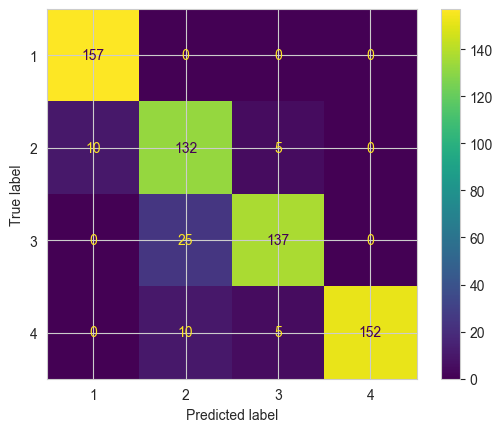

In [106]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model75.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model75.classes_)
disp.plot()
plt.show()

In [107]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9131121642969984
Confusion Matrix: [[157   0   0   0]
 [ 10 132   5   0]
 [  0  25 137   0]
 [  0  10   5 152]]
Classification Report:               precision    recall  f1-score   support

           1       0.94      1.00      0.97       157
           2       0.79      0.90      0.84       147
           3       0.93      0.85      0.89       162
           4       1.00      0.91      0.95       167

    accuracy                           0.91       633
   macro avg       0.92      0.91      0.91       633
weighted avg       0.92      0.91      0.91       633



Data Split Trainning 80% dan Test 20%

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.20, random_state=42)

In [109]:
# Define the MLP classifier
mlp_80 = MLPClassifier(hidden_layer_sizes=(100,  50), early_stopping=True, max_iter=500)

In [110]:
# Train the model
mlp_80.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500)

In [111]:
# Make predictions on the test set
y_pred = mlp_80.predict(X_test)

In [112]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9028436018957346


In [113]:
def permutation_importance(df_feat, df_target, mlp):
    # Convert DataFrame to NumPy array
    df_feat = df_feat.values
    importance = np.zeros(df_feat.shape[1])
    for col in range(df_feat.shape[1]):
        original_col = df_feat[:, col]
        df_feat[:, col] = np.random.permutation(original_col)
        mlp.fit(df_feat, df_target)
        pred = mlp.predict(df_feat)
        acc = accuracy_score(df_target, pred)
        df_feat[:, col] = original_col
        importance[col] = acc

    return importance

In [114]:
# Calculate feature importance
feature_importance = permutation_importance(X_train, y_train, mlp)

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
sorted_features = df_feat.columns[sorted_idx]

# Print the top 6 most important features
print("Top 6 most important features:")
for i in range(6):
    print(f"{i + 1}. {sorted_features[i]}")

Top 6 most important features:
1. berat_badan_turun
2. luka_lamban_sembuh
3. polidipsia
4. poliuria
5. gdp
6. gds


In [115]:
# Evaluate model accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate model using confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix_rf)

# Evaluate model using classification report
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:", classification_report_rf)

Accuracy: 0.9028436018957346
Confusion Matrix: [[110   0   0   0]
 [  8  81   5   0]
 [  0  16  91   0]
 [  0   8   4  99]]
Classification Report:               precision    recall  f1-score   support

           1       0.93      1.00      0.96       110
           2       0.77      0.86      0.81        94
           3       0.91      0.85      0.88       107
           4       1.00      0.89      0.94       111

    accuracy                           0.90       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.91      0.90      0.90       422



**Evaluasi**

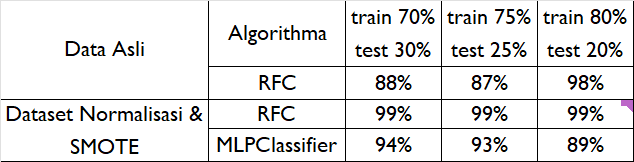

Dalam penelitian ini, dilakukan perbandingan antara algoritma Random Forest Classifier dan Mlpclassifier yaitu dengan melihat akurasi dan performa model dalam mencari feture model untuk mendapatkan hasi prediksi yang tepat.

In [116]:
#save model
import pickle

Terdapat library yang dapat digunakan untuk penyimpanan model yaitu dengan pickle.

In [117]:
# Simpan model RandomForestClassifier
with open('rfc_model.pkl', 'wb') as file:
    pickle.dump(rf_model75, file)

In [118]:
# Muat model RandomForestClassifier
with open('rfc_model.pkl', 'rb') as file:
    rfc_loaded = pickle.load(file)

In [119]:
# Prediksi menggunakan model yang dimuat
y_pred_rfc = rfc_loaded.predict(X_test)
print("Accuracy RandomForestClassifier:", accuracy_score(y_test, y_pred_rfc))

Accuracy RandomForestClassifier: 0.9881516587677726


In [120]:
# Simpan model MLPClassifier
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_80, file)

In [121]:
# Muat model MLPClassifier
with open('mlp_model.pkl', 'rb') as file:
    mlp_loaded = pickle.load(file)

In [122]:
# Prediksi menggunakan model yang dimuat
y_pred_mlp = mlp_loaded.predict(X_test)
print("Accuracy MLPClassifier:", accuracy_score(y_test, y_pred_mlp))

Accuracy MLPClassifier: 0.9028436018957346


Setelah melakukan import pickle untuk melakukan penyimpanan dengan menggunakan fungsi dump dengan parameter nama file model "model.pkl".